In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
x = np.array([0, 1, 2, 3], dtype=float)
f = np.array([1, 2, 4, 1], dtype=float)

In [17]:
# Определение функции для вычисления разделенных разностей
def divided_diff(x, f):
    n = len(f)
    coef = np.zeros([n, n])
    # первый столбец - это f
    coef[:,0] = f
    
    for j in range(1, n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

In [18]:
# Вычисление таблицы разделенных разностей
coef = divided_diff(x, f)

In [19]:
# Функция для оценки полинома Ньютона в определенной точке
def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (x - x_data[n-k])*p
    return p

In [20]:
# Оцениваем полином в x* = 1.5
x_star = 1.5
newton_polynomial_value = newton_poly(coef[0], x, x_star)

In [21]:
# Так как нам нужно добавить дополнительную точку f(4)=0 в наши данные
# для полинома N_4(x), мы расширяем наши массивы
x_extended = np.append(x, 4)
f_extended = np.append(f, 0)

In [22]:
# Пересчитываем разделенные разности с новой точкой
coef_extended = divided_diff(x_extended, f_extended)

# И оцениваем расширенный полином в x* = 1.5
newton_polynomial_extended_value = newton_poly(coef_extended[0], x_extended, x_star)

In [23]:
# Теперь определяем интерполяционный полином Ньютона, используя коэффициенты
def newton_interpolating_polynomial(x_data, coef, x):
    n = len(x_data) - 1
    p = np.poly1d([0])
    for i in range(n+1):
        term = np.poly1d([1])
        for j in range(i):
            term *= np.poly1d([1, -x_data[j]])
        p += term * coef[i]
    return p

In [24]:
# Создаем ряд значений x для построения графика
x_plot = np.linspace(np.min(x_extended)-0.5, np.max(x_extended)+0.5, 100)
# Получаем значения полинома для каждого x_plot
poly_values = newton_interpolating_polynomial(x, coef[0], x_plot)
poly_extended_values = newton_interpolating_polynomial(x_extended, coef_extended[0], x_plot)

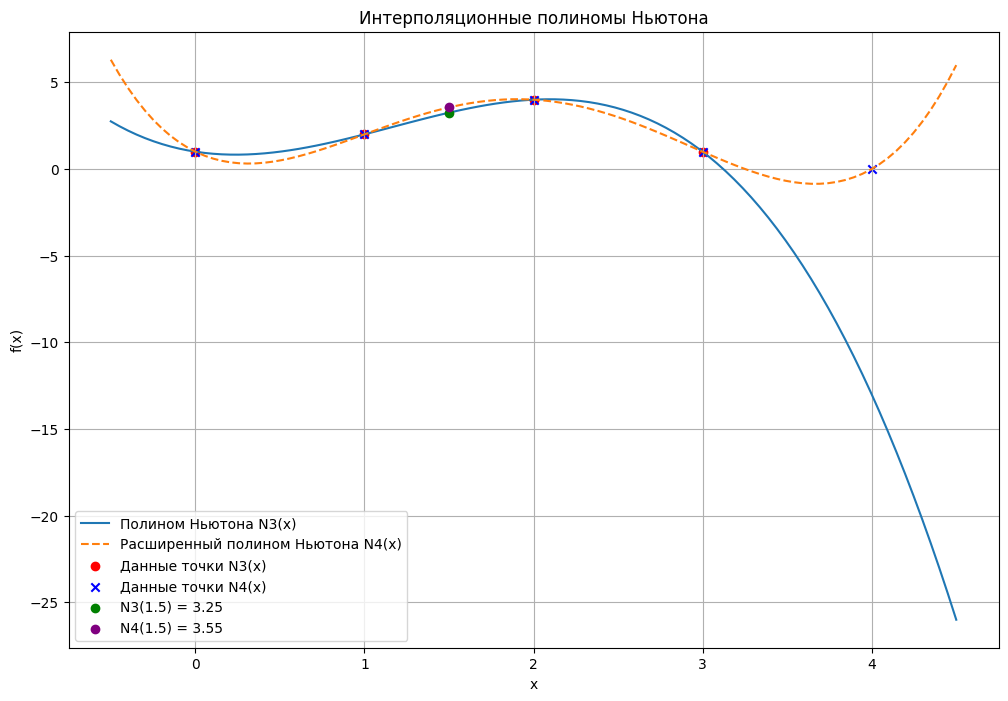

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(x_plot, poly_values(x_plot), label='Полином Ньютона N3(x)')
plt.plot(x_plot, poly_extended_values(x_plot), label='Расширенный полином Ньютона N4(x)', linestyle='--')
plt.scatter(x, f, color='red', label='Данные точки N3(x)')
plt.scatter(x_extended, f_extended, color='blue', label='Данные точки N4(x)', marker='x')
plt.scatter(x_star, newton_polynomial_value, color='green', label=f'N3(1.5) = {newton_polynomial_value:.2f}', zorder=5)
plt.scatter(x_star, newton_polynomial_extended_value, color='purple', label=f'N4(1.5) = {newton_polynomial_extended_value:.2f}', zorder=5)
plt.title('Интерполяционные полиномы Ньютона')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()